This colab notebook shows an analysis of COVID-19 BALF dataset from Liao et al. The object of the analysis is to find TPs that differentiate Resident T_cells of two patients groups (moderate vs. severe)

For this tutorial, we performed a pseudotime inference for the moderate and severe TRM cells in tSNE projection. [(Dai and Wang et al., Human Genetics 2021)](https://link.springer.com/article/10.1007%2Fs00439-021-02305-z)

![A picture](https://drive.google.com/uc?id=1IYA_6pSU2b0PbzkPf4DLMXGOkBBOcwqM)

The folllowing packages are required to install to run the entire notebook.

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==1.15.0
!pip install h5py==2.10.0

Import required packages.

In [ ]:
%%capture
import DrivAER as dv
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import warnings
sc.settings.verbosity = 1
sc.logging.print_versions()
warnings.filterwarnings("ignore")

Download and load AnnData object.

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

In [ ]:
!pip install gdown

In [ ]:
!mkdir data
!gdown https://drive.google.com/uc?id=1TAoRzMm79hoMG6C9aVBW_moCxdNGQ_IQ -O data/Resident_T_cell_expr.csv
!gdown https://drive.google.com/uc?id=1Vm0ozbv6v1U-8GT1DEPAeauHRtgGFkvR -O data/Resident_T_cell_meta.csv

mkdir: cannot create directory ‘data’: File exists
Downloading...
From: https://drive.google.com/uc?id=1TAoRzMm79hoMG6C9aVBW_moCxdNGQ_IQ
To: /content/data/Resident_T_cell_expr.csv
10.5MB [00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vm0ozbv6v1U-8GT1DEPAeauHRtgGFkvR
To: /content/data/Resident_T_cell_meta.csv
100% 330k/330k [00:00<00:00, 40.5MB/s]


In [ ]:
pd_meta = pd.read_csv("data/Resident_T_cell_meta.csv", index_col=0)
print(pd_meta.shape)

(1101, 36)


In [ ]:
pd_meta

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,ID,sample,sample_new,group,group1,disease,nCoV_mean,nFeature_RNA_low,nFeature_RNA_high,before,filter,integrated_snn_res.1.2,seurat_clusters,idt,hasnCoV,cluster,integrated_snn_res.0.8,celltype,nCount_SCT,nFeature_SCT,sig.score,original_group,cell_type,filter_outlier,RNA_snn_res.0.6,SCT_snn_res.0.6,percent.mt,naive.markers,effector.markers,naive.no.sell.markers,new_cell_type,slingshot_pseudotime
AAACGGGGTGGAAAGA_5,C141,2969,1488,1.414618,AAACGGGGTGGAAAGA_5,C141,O1,M,O,Y,0.000000,200,6000,4233,True,9,0,9,N,9,5,CD8 T,3227,1478,0.494727,O,M,True,1,0,1.611404,0.000000,0.123954,0.000000,M_Resident_T,7.735994
AAAGATGTCAGGTTCA_5,C141,4244,1775,2.073516,AAAGATGTCAGGTTCA_5,C141,O1,M,O,Y,0.000000,200,6000,4233,True,6,1,6,N,6,5,CD8 T,3895,1771,0.189305,O,M,True,2,1,1.925546,0.025674,0.513479,0.025674,M_Resident_T,35.811455
AAAGCAACAGCGTCCA_5,C141,2425,1324,0.701031,AAAGCAACAGCGTCCA_5,C141,O1,M,O,Y,0.000000,200,6000,4233,True,9,1,9,N,9,1,CD8 T,3064,1330,0.343019,O,M,True,2,1,1.011749,0.000000,0.228460,0.000000,M_Resident_T,32.322671
AAATGCCCATGTCTCC_5,C141,4943,1883,1.881449,AAATGCCCATGTCTCC_5,C141,O1,M,O,Y,0.000000,200,6000,4233,True,9,2,9,N,9,1,CD8 T,4006,1866,0.266854,O,M,True,0,2,1.647529,0.000000,0.199700,0.000000,M_Resident_T,55.413494
AAATGCCGTGGGTATG_5,C141,4402,1948,1.681054,AAATGCCGTGGGTATG_5,C141,O1,M,O,Y,0.000000,200,6000,4233,True,9,0,9,N,9,5,CD8 T,3958,1944,0.436975,O,M,True,1,0,1.490652,0.000000,0.075796,0.000000,M_Resident_T,5.485369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGAAGCATTATCTC_13,C152,3599,1685,4.890247,TTCGAAGCATTATCTC_13,C152,C5,S,S/C,Y,0.096482,200,6000,6962,True,9,4,9,N,9,1,CD8 T,3583,1670,0.287727,S/C,S,True,5,4,4.912085,0.000000,0.279096,0.000000,S_Resident_T,59.533945
TTGAACGGTAGGAGTC_13,C152,3011,1299,6.210561,TTGAACGGTAGGAGTC_13,C152,C5,S,S/C,Y,0.096482,200,6000,6962,True,9,4,9,N,9,2,CD8 T,3275,1286,0.251114,S/C,S,True,5,4,6.595420,0.030534,0.549618,0.000000,S_Resident_T,60.544734
TTGGCAAAGCTAGGCA_13,C152,3928,1555,2.698574,TTGGCAAAGCTAGGCA_13,C152,C5,S,S/C,Y,0.096482,200,6000,6962,True,9,4,9,N,9,1,CD8 T,3742,1550,0.290517,S/C,S,True,5,4,2.618920,0.000000,0.694816,0.000000,S_Resident_T,59.410402
TTTCCTCAGAGACTTA_13,C152,4028,1769,3.301887,TTTCCTCAGAGACTTA_13,C152,C5,S,S/C,Y,0.096482,200,6000,6962,True,9,4,9,N,9,1,CD8 T,3799,1764,0.230591,S/C,S,True,5,4,3.106081,0.026323,0.473809,0.026323,S_Resident_T,60.544734


In [ ]:
pd_meta.slingshot_pseudotime.describe()

count    1101.000000
mean       29.898528
std        16.408466
min         0.000000
25%        15.798873
50%        29.546749
75%        43.095121
max        60.544734
Name: slingshot_pseudotime, dtype: float64

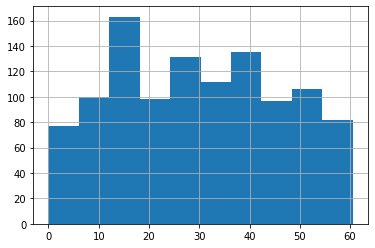

In [ ]:
pd_meta.slingshot_pseudotime.hist()

In [ ]:
ad = sc.read_csv("data/Resident_T_cell_expr.csv").T
ad.obs = pd_meta

In [ ]:
ad = ad[~ad.obs.slingshot_pseudotime.isna(),:]

In [ ]:
print(ad.shape, ad.X.mean(), ad.X.max())

(1101, 4697) 0.73504066 599.0


In [ ]:
# sc.pp.filter_genes_dispersion(ad)
mini = ad.obs.slingshot_pseudotime.min()
maxi = ad.obs.slingshot_pseudotime.max()
print(mini, maxi)
ad.obs.slingshot_pseudotime = (ad.obs.slingshot_pseudotime-mini) / (maxi-mini)
print(ad.obs.slingshot_pseudotime)

0.0 60.5447337799648
AAACGGGGTGGAAAGA_5     0.127773
AAAGATGTCAGGTTCA_5     0.591488
AAAGCAACAGCGTCCA_5     0.533864
AAATGCCCATGTCTCC_5     0.915249
AAATGCCGTGGGTATG_5     0.090600
                         ...   
TTCGAAGCATTATCTC_13    0.983305
TTGAACGGTAGGAGTC_13    1.000000
TTGGCAAAGCTAGGCA_13    0.981265
TTTCCTCAGAGACTTA_13    1.000000
TTTGCGCTCTAACCGA_13    0.985230
Name: slingshot_pseudotime, Length: 1101, dtype: float64


In [ ]:
np.random.seed(520)
python_random.seed(520)
tf.random.set_random_seed(520)

hm_human = dv.get_anno(filename="hallmark.gmt", filetype="gmt", conv_mouse=False)
res = dv.calc_relevance(count=ad, pheno=ad.obs.slingshot_pseudotime, tf_targets = hm_human, min_targets=10, epochs=100)

1 / 45
dca: Successfully preprocessed 78 genes and 1101 cells.
dca: Calculating low dimensional representations...
2 / 45
dca: Successfully preprocessed 67 genes and 1101 cells.
dca: Calculating low dimensional representations...
3 / 45
dca: Successfully preprocessed 26 genes and 1101 cells.
dca: Calculating low dimensional representations...
4 / 45
dca: Successfully preprocessed 84 genes and 1101 cells.
dca: Calculating low dimensional representations...
5 / 45
dca: Successfully preprocessed 10 genes and 1101 cells.
dca: Calculating low dimensional representations...
6 / 45
dca: Successfully preprocessed 23 genes and 1101 cells.
dca: Calculating low dimensional representations...
7 / 45
dca: Successfully preprocessed 41 genes and 1101 cells.
dca: Calculating low dimensional representations...
8 / 45
dca: Successfully preprocessed 87 genes and 1101 cells.
dca: Calculating low dimensional representations...
9 / 45
dca: Successfully preprocessed 87 genes and 1101 cells.
dca: Calculating 

Now, we can plot the relevance scores. Interferon related gene sets are the the most relevant gene sets for T cells after interferon stimulation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def rank_plot_1(result, save=False, path='./',number=10):
    score = pd.DataFrame({'Signature': result[2], 'Relevance Score': result[1]})
    score = score.sort_values('Relevance Score',ascending=False)
    new_df = score.head(number)
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x="Relevance Score", y="Signature", data=new_df, palette=sns.color_palette("Blues_r",10))
    plt.xticks(rotation='horizontal',fontsize=20)
    plt.yticks(fontsize=26)
    plt.xlabel('Relevance Score', fontsize=22)
    ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
    fig = plt.gcf()
    plt.show()
    if save:
        fig.savefig(path + 'rank.svg', bbox_inches='tight')
    top_TF = score.head(n=5)['Signature'].tolist()
    print("Top_TF",":",top_TF)

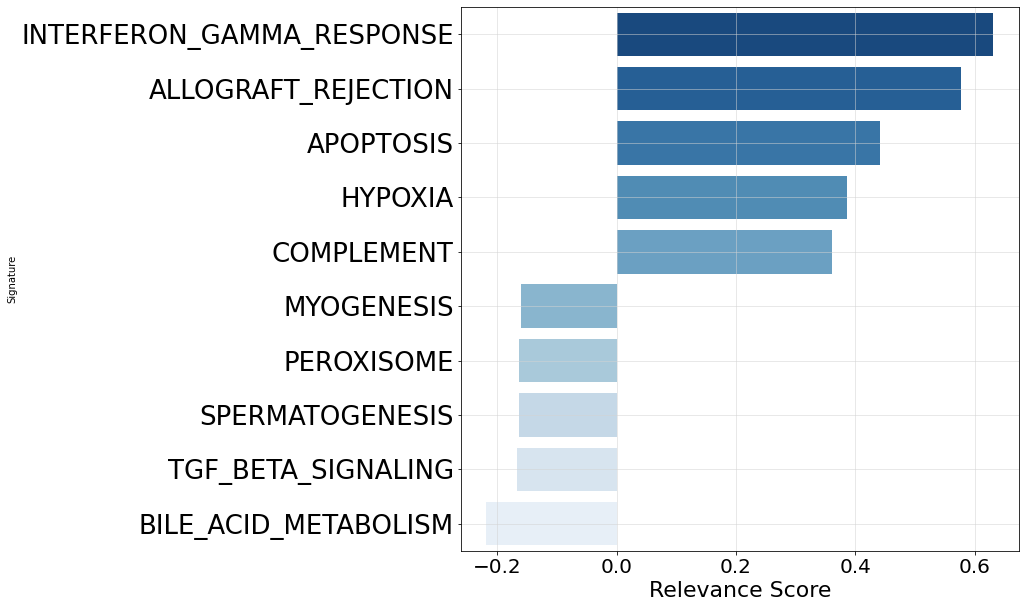

Top_TF : ['INTERFERON_GAMMA_RESPONSE', 'ALLOGRAFT_REJECTION', 'APOPTOSIS', 'HYPOXIA', 'COMPLEMENT']
Worse_TF : ['MYOGENESIS', 'PEROXISOME', 'SPERMATOGENESIS', 'TGF_BETA_SIGNALING', 'BILE_ACID_METABOLISM']


In [ ]:
dv.rank_plot(result=res)

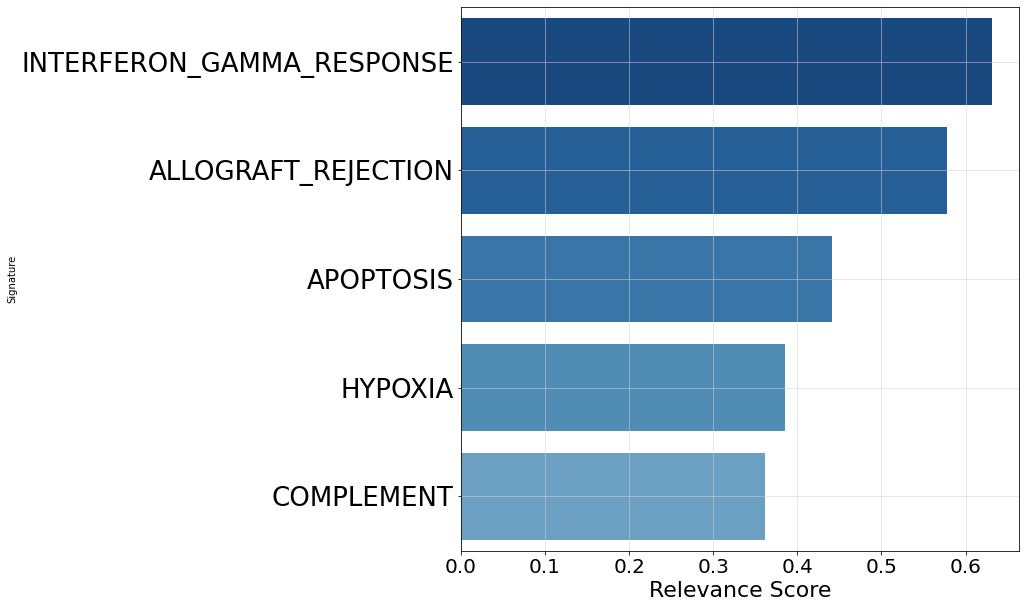

Top_TF : ['INTERFERON_GAMMA_RESPONSE', 'ALLOGRAFT_REJECTION', 'APOPTOSIS', 'HYPOXIA', 'COMPLEMENT']


In [ ]:
rank_plot_1(result=res,number=5)

Next, we visualize the data manifold of the HALLMARK_INTERFERON_GAMMA_RESPONSE gene set. We can see a clear separation between stimulated and unstimulated cells.

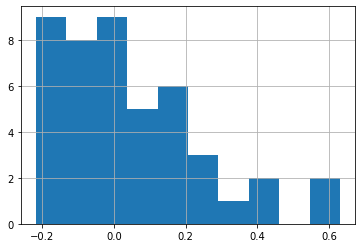

In [ ]:
df_pathway = pd.DataFrame({"TP" : res[2], "RS" : res[1]}).sort_values("RS", ascending=False)
df_pathway.to_csv("Resident_T-pathway.csv")
df_pathway.RS.hist()

In [ ]:
np.random.seed(520)
python_random.seed(520)
tf.random.set_random_seed(520)

ad = sc.read_csv("data/Resident_T_cell_expr.csv").T
ad.obs = pd_meta
ad = ad[~ad.obs.slingshot_pseudotime.isna(),:]
mini = ad.obs.slingshot_pseudotime.min()
maxi = ad.obs.slingshot_pseudotime.max()
print(mini, maxi)
ad.obs.slingshot_pseudotime = (ad.obs.slingshot_pseudotime-mini) / (maxi-mini)
print(ad.obs.slingshot_pseudotime)

tf_human = dv.get_anno(filename="trrust_human.tsv", filetype="tsv", conv_mouse=False)
print(tf_human)
res_tf = dv.calc_relevance(count=ad, pheno=ad.obs.slingshot_pseudotime, tf_targets = tf_human, min_targets=10, epochs = 100)
ad

0.0 60.5447337799648
AAACGGGGTGGAAAGA_5     0.127773
AAAGATGTCAGGTTCA_5     0.591488
AAAGCAACAGCGTCCA_5     0.533864
AAATGCCCATGTCTCC_5     0.915249
AAATGCCGTGGGTATG_5     0.090600
                         ...   
TTCGAAGCATTATCTC_13    0.983305
TTGAACGGTAGGAGTC_13    1.000000
TTGGCAAAGCTAGGCA_13    0.981265
TTTCCTCAGAGACTTA_13    1.000000
TTTGCGCTCTAACCGA_13    0.985230
Name: slingshot_pseudotime, Length: 1101, dtype: float64
TF
AATF                         [BAX, CDKN1A, KLK3, MYC, TP53]
ABL1      [BAX, BCL2, BCL6, CCND2, CDKN1A, CSF1, FOXO3, ...
AES                                     [EPHA3, LEF1, RND3]
AHR       [ABCG2, AHRR, ARNT, BRCA1, CA9, CCND1, CCNG2, ...
AIP                         [AHR, GREB1, NFKB2, RSF1, TFF1]
                                ...                        
ZNF410                                               [MMP1]
ZNF423                                              [BRCA1]
ZNF444                                             [SCARF1]
ZNF76                      

AnnData object with n_obs × n_vars = 1101 × 4697
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'ID', 'sample', 'sample_new', 'group', 'group1', 'disease', 'nCoV_mean', 'nFeature_RNA_low', 'nFeature_RNA_high', 'before', 'filter', 'integrated_snn_res.1.2', 'seurat_clusters', 'idt', 'hasnCoV', 'cluster', 'integrated_snn_res.0.8', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'sig.score', 'original_group', 'cell_type', 'filter_outlier', 'RNA_snn_res.0.6', 'SCT_snn_res.0.6', 'percent.mt', 'naive.markers', 'effector.markers', 'naive.no.sell.markers', 'new_cell_type', 'slingshot_pseudotime'
    var: 'n_counts'

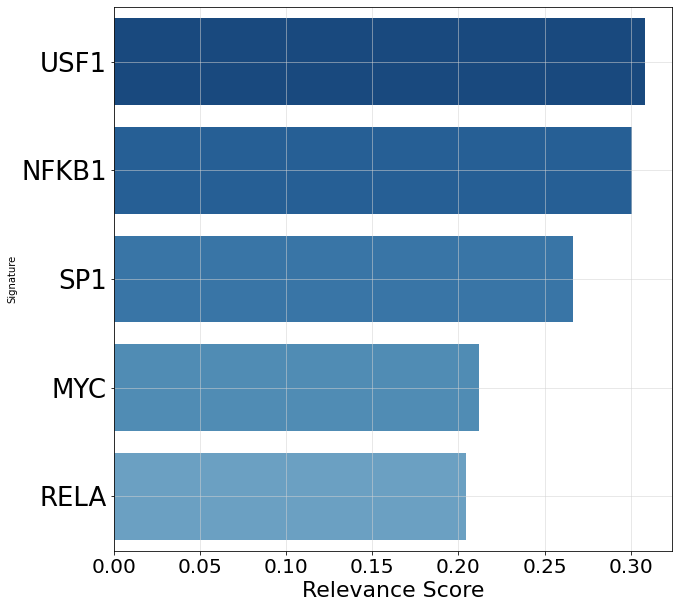

Top_TF : ['USF1', 'NFKB1', 'SP1', 'MYC', 'RELA']


In [ ]:
rank_plot_1(result=res_tf,number=5)

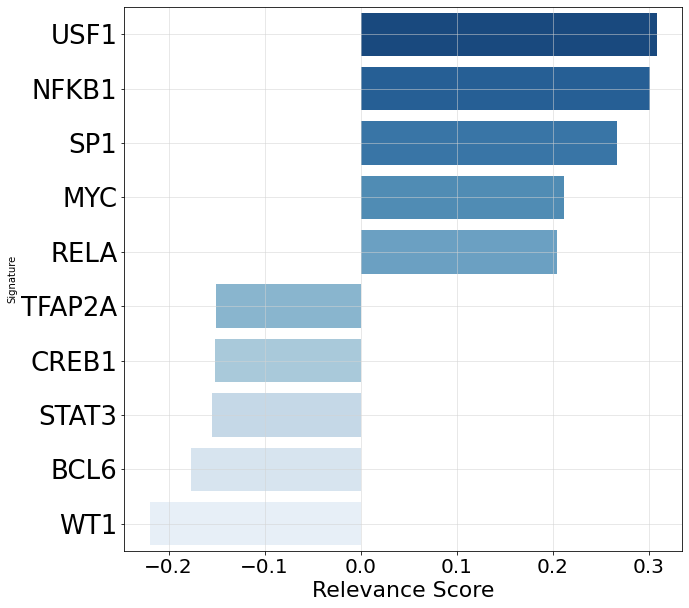

Top_TF : ['USF1', 'NFKB1', 'SP1', 'MYC', 'RELA']
Worse_TF : ['TFAP2A', 'CREB1', 'STAT3', 'BCL6', 'WT1']


In [ ]:
dv.rank_plot(result=res_tf)

Next, we visualize the data manifold of the HALLMARK_INTERFERON_GAMMA_RESPONSE gene set. We can see a clear separation between stimulated and unstimulated cells.

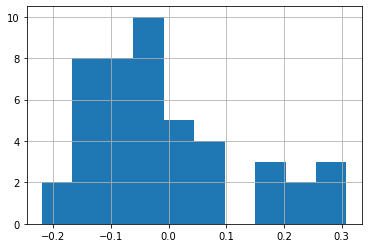

In [ ]:
df_tf = pd.DataFrame({"TP" : res_tf[2], "RS" : res_tf[1]}).sort_values("RS", ascending=False)
df_tf.to_csv("Resident_T-TF.csv")
df_tf.RS.hist()